# Graph Spectra
This project aims to implement and test the [spectral graph clustering](https://www.absolutdata.com/learn-analytics-whitepapers-webinars/spectral-clustering/) algorithm as described in the paper [“On Spectral Clustering: Analysis and an algorithm”](http://ai.stanford.edu/~ang/papers/nips01-spectral.pdf). Using the implementation of the K-eigenvector algorithm, two sample graphs will be analyzed:
- Sample Graph 1: Dataset prepared by Ron Burt, where he dug out the 1966 data collected by Coleman, Katz and Menzel on medical innovation.
- Sample Graph 2: A synthetic graph provided for the assignment.

## Implementation
Two implementations of the algorithm are provided, using both Matlab for simpler implementation and Python in a Jupyter Notebook together with the libraries NumPy, NetworkX, Scipy, and NLTK. In both implementations, the results and steps are equivalent.

To execute the *Python* implementation, the cluster size can be specified by changing the variable ‘cluster_size’ and the id of the dataset needs to be indicated with the variable ‘dataset_id’ (using the sample graph 2 as default).

In the *Matlab* implementation, in addition to the basic version of the algorithm where k has to be specified, an additional estimation of the cluster size was added, by analyzing the gaps between the eigenvalues. This allows the user to just provide the graph as input and the implementation will select the best estimation of k.

## Results

More details about the implementation together with the explanation of the results can be found in the project report.

## Authors
- Serghei Socolovschi [serghei@kth.se](mailto:serghei@kth.se)
- Angel Igareta [alih2@kth.se](mailto:alih2@kth.se) 


## Dependencies

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from scipy.sparse.linalg import eigsh
from sklearn.cluster import KMeans

## Dataset

In [ ]:
graph_filename = 'graph.txt'
cluster_size = 2
dataset_id = '1g4k1HBWZRDB3Kf6u4EAY3jvlhm_esrv0' # Graph 1 => 1dVVNDcAvXOIPdN0KhM9ZDsGhgESqyzYf | Graph 2 => 1g4k1HBWZRDB3Kf6u4EAY3jvlhm_esrv0

In [ ]:
!wget -O $graph_filename 'https://drive.google.com/uc?export=download&id=$dataset_id'

--2020-12-01 11:01:23--  https://drive.google.com/uc?export=download&id=1g4k1HBWZRDB3Kf6u4EAY3jvlhm_esrv0
Resolving drive.google.com (drive.google.com)... 74.125.142.102, 74.125.142.101, 74.125.142.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l1dtkii2qccfp27u84uk0mofjhtqd314/1606820475000/11311344722664371046/*/1g4k1HBWZRDB3Kf6u4EAY3jvlhm_esrv0?e=download [following]
--2020-12-01 11:01:23--  https://doc-0c-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/l1dtkii2qccfp27u84uk0mofjhtqd314/1606820475000/11311344722664371046/*/1g4k1HBWZRDB3Kf6u4EAY3jvlhm_esrv0?e=download
Resolving doc-0c-50-docs.googleusercontent.com (doc-0c-50-docs.googleusercontent.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to doc-0c-50-docs.googleusercontent.com (doc-0c

### Read dataset raw

In [ ]:
graph_raw = open(graph_filename, "r")
graph_edges = [tuple(map(int, graph_raw_edge.replace('\n', '').split(',')))[:2] for graph_raw_edge in graph_raw.readlines()]
graph_edges[:5]

[(2, 1), (9, 1), (12, 1), (18, 1), (20, 1)]

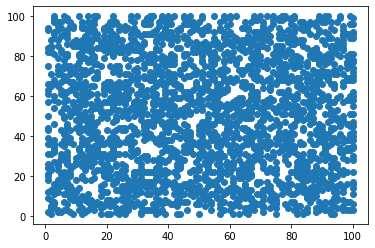

In [ ]:
data = np.array(graph_edges)
plt.scatter(data[:, 0], data[:, 1]) 

### Load graph

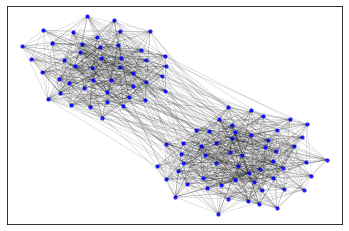

In [ ]:
graph = nx.Graph(graph_edges)
graph_node_position = nx.spring_layout(graph)
number_nodes = graph.number_of_nodes()

nx.draw_networkx_nodes(graph, graph_node_position, nodelist=range(1, number_nodes + 1), node_color='b', node_size=10, alpha=0.8)
nx.draw_networkx_edges(graph, graph_node_position, edgelist=graph_edges, width=0.1, alpha=0.5, edge_color='k')

## Implementation

### Adjacency and Degree Matrix

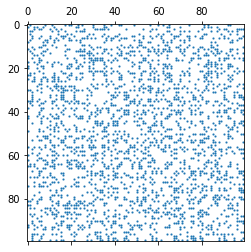

In [ ]:
adjacency_matrix = nx.adjacency_matrix(graph, nodelist=sorted(graph.nodes())).todense()
degree_matrix = np.diagflat(adjacency_matrix.sum(axis=1))

plt.spy(adjacency_matrix, markersize=1)

### Laplacian Matrix

In [ ]:
transformed_degree_matrix = np.where(degree_matrix != 0, np.power(degree_matrix, -0.5), 0)
laplacian_matrix = transformed_degree_matrix * adjacency_matrix * transformed_degree_matrix
laplacian_matrix[:1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in power
  """Entry point for launching an IPython kernel.


matrix([[0.        , 0.05057217, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.04914732, 0.        ,
         0.        , 0.03940552, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.04662524, 0.        , 0.04256283,
         0.04347826, 0.        , 0.        , 0.04347826, 0.        ,
         0.04089304, 0.        , 0.        , 0.        , 0.        ,
         0.04170288, 0.        , 0.        , 0.        , 0.        ,
         0.03686049, 0.        , 0.        , 0.04347826, 0.        ,
         0.        , 0.        , 0.04550158, 0.04445542, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.04256283,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.0362977 , 0.        , 0.        , 0.        ,
         0.04170288, 0.        , 0.04445542, 0.        , 0.        ,
         0.03940552, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

### Find K-Largest Eigen Vectors


In [ ]:
eigen_values, eigen_matrix = eigsh(laplacian_matrix, k=cluster_size, which='LA')

print(eigen_matrix[:5])
print(eigen_values)

[[-0.10712526 -0.09752945]
 [-0.09427614 -0.0838487 ]
 [ 0.09794083 -0.10369517]
 [-0.09051152 -0.09319262]
 [-0.09229372 -0.0862796 ]]
[0.83442848 1.        ]


### Normalize matrix


In [ ]:
eigen_matrix_norm = np.linalg.norm(eigen_matrix, axis=1, keepdims=True)
normalized_eigen_matrix = eigen_matrix / eigen_matrix_norm
normalized_eigen_matrix[:5]

array([[-0.73944909, -0.67321248],
       [-0.74722164, -0.66457492],
       [ 0.68664762, -0.72699041],
       [-0.6967126 , -0.71735037],
       [-0.73050708, -0.68290512]])

## K-Means
Perform KMeans and show final results. Assign a node to a cluster only if that node has that cluster assigned in the kmeans result

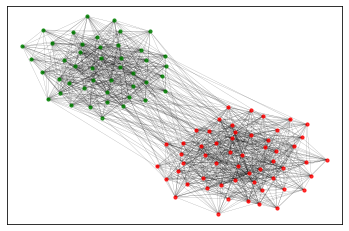

In [ ]:
labels = KMeans(n_clusters=cluster_size, max_iter=1000).fit_predict(normalized_eigen_matrix)
colors = ['r', 'g', 'b', 'y']

for i in range(0, cluster_size):
  nodelist = [node_index for node_index in range(1, number_nodes + 1) if i == labels[node_index - 1]]
  nx.draw_networkx_nodes(graph, graph_node_position, nodelist=nodelist, node_color=colors[i], node_size=10, alpha=0.8)

nx.draw_networkx_edges(graph, graph_node_position, edgelist=graph_edges, width=0.1, alpha=0.5, edge_color='k')